* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration

In [9]:
import pandas as pd
from core.match import Match
from core.payoff import PayoffMatrix
from strategies.basic import AlwaysCooperate, AlwaysDefect
from strategies.advanced import TitForTat, Random
from tournaments.roundrobin import RoundRobinTournament

Parameters

Torunament Initialization

In [ ]:
import numpy as np
from collections import Counter

#The initial population of players (strategies), it may change after each generation iteration 
players = [AlwaysCooperate(), AlwaysDefect(), TitForTat(),
           Random(name='Mainly Nice', p=0.7), Random(name='Mainly Bad', p=0.3)]

M = PayoffMatrix()
N_rounds = 50
# Tracking history for visualization
history_population = []

# The Algorithm works in this way: at each step (generation) the algorithm calculates the score of all the players (strategies) using 
# the torunament class, calculates the average score achived in this generation and then compare the score achieved by each strategy 
# with the fitness value (the average score + margin), if a strategy scores more then the fitness it will thrive and will be added +1
# of that strategy to the population, if it scores less it will die and if it stays in the margin, it will survive. 
for generation in range(100):
    print(f"--- GENERATION {generation + 1} ---")
    
    # Track current population
    current_names = [p.name for p in players]
    counts = Counter(current_names)
    history_population.append(counts)
    
    tournament = RoundRobinTournament(players, N_rounds, M)
    tournament.play_tournament(output = False)
    
    # Get results from tournament instance
    Total_score = tournament.Total_score
    N_wins = tournament.N_wins
    N_ties = tournament.N_ties
    
    # Relative Fitness Calculations
    avg_score = np.mean(Total_score)
    margin = avg_score * 0.1 # 10% threshold
    print(f"Avg Score: {avg_score:.1f} (Threshold: +/- {margin:.1f})")
    
    # Find Best Strategy 
    best_index = np.argmax(Total_score)
    print(f"Best Strategy: {players[best_index].name} with score {Total_score[best_index]}")
    
    # Evolutionary Step
    next_gen_players = []
    for i in range(len(players)):
        score = Total_score[i]
        name = players[i].name
        status = "Survives"
        
        if score > avg_score + margin:
            # Thrives: +1 offspring (Total 2 copies)
            next_gen_players.extend([players[i], players[i]])
            status = "Thrives (+1)"
        elif score < avg_score - margin:
            # Dies: Removed
            status = "Dies (Removed)"
        else:
            # Survives: Kept as is
            next_gen_players.append(players[i])
            
        print(f"{name}: {score:.0f} -> {status}")
            
    players = next_gen_players
    N = len(players)
    print(f"New Population Size: {N}\n")
    
    if N == 0:
        print("Extinction!")
        break

--- GENERATION 1 ---
Avg Score: 446.0 (Threshold: +/- 44.6)
Best Strategy: AlwaysDefect with score 624.0
AlwaysCooperate: 285 -> Dies (Removed)
AlwaysDefect: 624 -> Thrives (+1)
TitForTat: 415 -> Survives
Mainly Nice: 372 -> Dies (Removed)
Mainly Bad: 534 -> Thrives (+1)
New Population Size: 5

--- GENERATION 2 ---
Avg Score: 288.4 (Threshold: +/- 28.8)
Best Strategy: AlwaysDefect with score 344.0
AlwaysDefect: 344 -> Thrives (+1)
AlwaysDefect: 344 -> Thrives (+1)
TitForTat: 276 -> Survives
Mainly Bad: 231 -> Dies (Removed)
Mainly Bad: 247 -> Dies (Removed)
New Population Size: 5

--- GENERATION 3 ---
Avg Score: 202.4 (Threshold: +/- 20.2)
Best Strategy: AlwaysDefect with score 204.0
AlwaysDefect: 204 -> Survives
AlwaysDefect: 204 -> Survives
AlwaysDefect: 204 -> Survives
AlwaysDefect: 204 -> Survives
TitForTat: 196 -> Survives
New Population Size: 5

--- GENERATION 4 ---
Avg Score: 202.4 (Threshold: +/- 20.2)
Best Strategy: AlwaysDefect with score 204.0
AlwaysDefect: 204 -> Survives
A

# Population Visualization

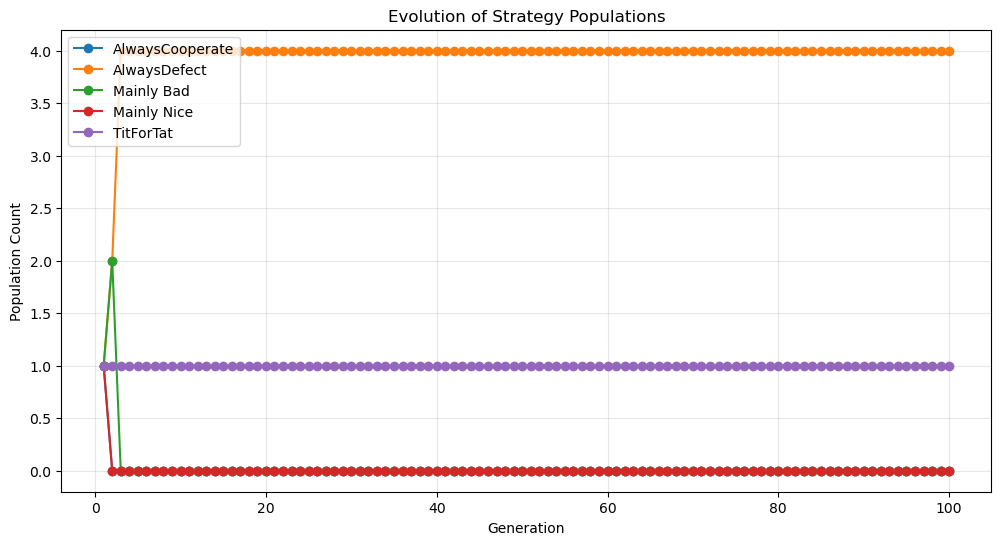

In [17]:
import matplotlib.pyplot as plt

# Prepare data for Line Plot
all_strategies = set()
for counts in history_population:
    all_strategies.update(counts.keys())
sorted_strategies = sorted(list(all_strategies))

x = range(1, len(history_population) + 1)

plt.figure(figsize=(12, 6))

for strategy in sorted_strategies:
    y_strategy = []
    for counts in history_population:
        y_strategy.append(counts.get(strategy, 0))
    # Plotting each strategy as a line
    plt.plot(x, y_strategy, label=strategy, marker='o')

plt.title('Evolution of Strategy Populations')
plt.xlabel('Generation')
plt.ylabel('Population Count')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()